In [26]:
import re
import operator
import imageio
import numpy as np
import cv2 as cv
import os
from matplotlib import pyplot as plt
from pylab import *

Write a function that takes as an input matrix T of vectorized images from subset 0. The output of this function are the 20 first singular vectors U[:, 1], . . . , U[:, 20]. Display the first 3 vectors as images, i.e., reshape them to size 50×50 and display them.

In [2]:
def get_data_label(path):
    path_list = os.listdir(path)
    length = len(path_list)
    Image = np.zeros((2500, length))
    label = np.zeros((1,length))
    i = 0
    
    for filename in path_list:
        file_0 = os.path.join(path, filename)
        img = cv.imread(file_0, cv.IMREAD_GRAYSCALE)
        Image[:,i] = np.array(img).reshape(-1)
        label_str=re.sub("\D", "", filename)
        label_num=int(label_str[0:2])
        label[:,i] = label_num
        i = i+1
    return Image, label


#print(Input, Input.shape)    #得到输入图像  

#k=0
#for n in range(0,70):     #得到对应的label
    #label[0,k] = n//7 + 1
    #k = k+1


In [3]:
#求svd
def extractU(image):
    
    U,sigma,VT=np.linalg.svd(image)
    U_out = U[:,0:20]
    subplot(1,3,1)
    plt.imshow(U_out[:,0].reshape((50,50)), 'gray')
    subplot(1,3,2)
    title('Extract')
    plt.imshow(U_out[:,1].reshape((50,50)), 'gray')
    subplot(1,3,3)
    plt.imshow(U_out[:,2].reshape((50,50)), 'gray')
    return U_out

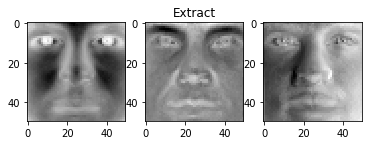

In [4]:
#生成图片
path0 = './yaleBfaces/subset0'
Train_set,Train_label=get_data_label(path0)
U_out = extractU(Train_set)


In [5]:
path1 = './yaleBfaces/subset1'
Test_set1,Test_label1=get_data_label(path1)
path2 = './yaleBfaces/subset2'
Test_set2,Test_label2=get_data_label(path2)
path3 = './yaleBfaces/subset3'
Test_set3,Test_label3=get_data_label(path3)
path4 = './yaleBfaces/subset4'
Test_set4,Test_label4=get_data_label(path4)


Write a function that takes as an input the training set T (a matrix composed of vectorized pictures from subset 0), a vector containing the labels of the training set (i.e., if the the i-th sample belongs to class j, the i-th entry of the labels vector is j. In this exercise j is an integer between 1 and 10), the test samples S (a matrix composed of vectorized pictures from subsets 1-4) and the corresponding labels (in a separate vector), the 20 singular vectors from the first step, and the parameter k that denotes how many of the PCs are used. Use the Euclidean distance to classify each sample image based on its three nearest neighbors. (This is done by comparing the test samples with the training samples in the reduced space.) As an output give the fraction of images from S that were misclassified, i.e., the error rate. Repeat this for subsets 1 through 4 and for k = 1,...,20. Plot the error rate for each subset.

In [31]:
def errorrate(T,T_label,S,S_label,U0_out,k):
    u_reduce = U0_out[:,0:k]
    T_reduce = np.dot(u_reduce.T, T)
    S_reduce = np.dot(u_reduce.T, S)
    Slabel_knn = np.zeros(shape(S_label))
    for i in np.arange(0,S.shape[1]):
        
        ## step 1: calculate Euclidean distance
        diff = S_reduce[:,i,None]-T_reduce
        squaredDiff = diff ** 2
        squaredDist = sum(squaredDiff,axis = 0)
        distance = squaredDist ** 0.5
        
        ## step 2: sort the distance
        sortedDistIndices = argsort(distance)   #.reshape((-1,1))
        print(sortedDistIndices, sortedDistIndices[1])
        classCount = {}
        print(T_label)
        for j in range(0,3):
            ## step 3: choose the min k distance
            voteLabel = T_label[:, sortedDistIndices[j]]
            print(voteLabel)
            ## step 4: count the times labels occur
            classCount[voteLabel] = classCount.get(voteLabel,0)+1
            
        ## step 5: the max voted class will return
        maxCount = 0
        for key, value in classCount.items():
            if value > maxCount:
                maxCount = value
                maxIndex = key
        Slabel_knn[i] = maxIndex
        
    error = np.sum(S_label!=Slabel_knn,axis = 0)
    errorrate = error/S_label.size
        
    return errorrate

In [32]:
errorrate(Train_set,Train_label,Test_set1,Test_label1, U_out ,20)

[ 3  0  1  5  2 43 45  6  4 42 47 48 38 27 21 22 46 35 24  9 25 26 37  7
 16 44 10 50 30 52 49 57 36 59 55 28 39 40 14 65 23 56 12 54 53 41 32 17
 11 31  8 61 33 62 13 51 60 34 18 19 58 29 63 15 66 20 67 68 64 69] 0
[[ 1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.
   3.  3.  3.  4.  4.  4.  4.  4.  4.  4.  5.  5.  5.  5.  5.  5.  5.  6.
   6.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  7.  7.  8.  8.  8.  8.  8.
   8.  8.  9.  9.  9.  9.  9.  9.  9. 10. 10. 10. 10. 10. 10. 10.]]
[1.]


TypeError: unhashable type: 'numpy.ndarray'